# Compare the different fit

Startup run in 5.630221128463745 secs.


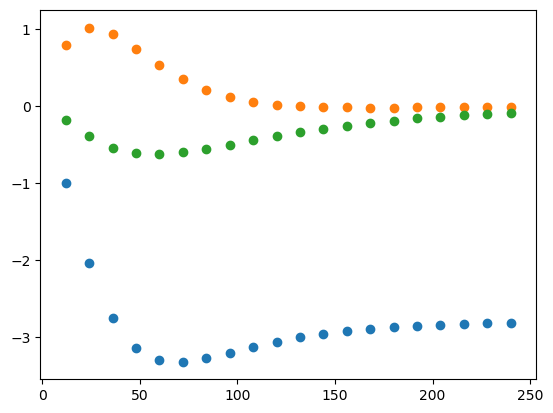

false

In [1]:
using NBInclude
_VERS_ = :base
@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/comparefit")
_tosave = false

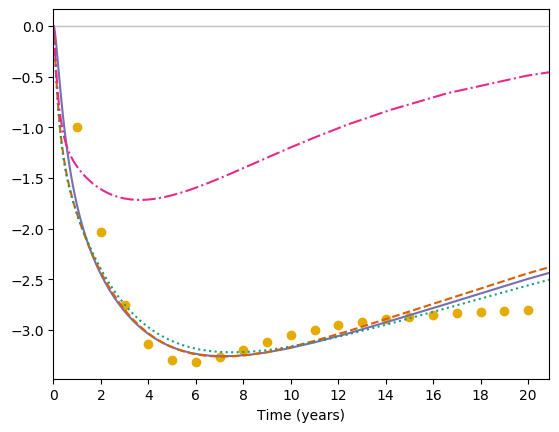

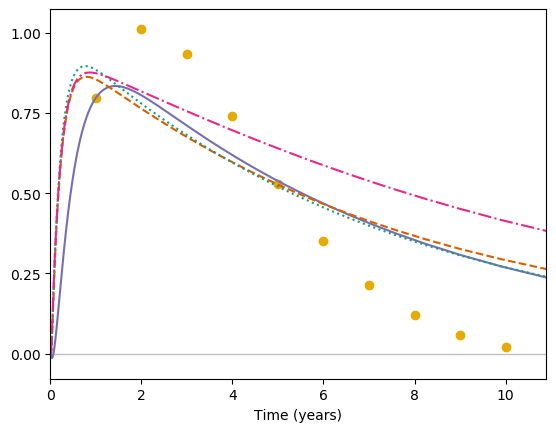

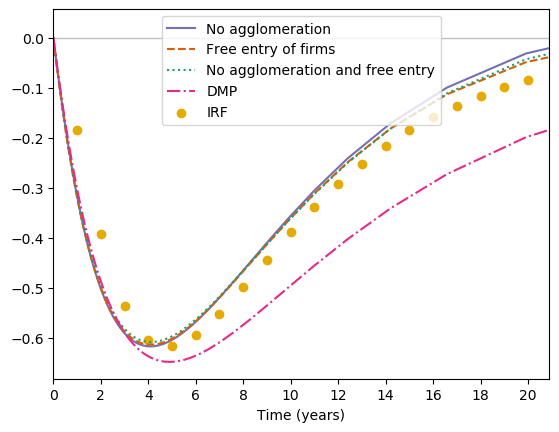

()

In [2]:
p_DMP = initial_StrucPar_noagglo(146.9463244310906, 0.0, 0.07088599651973315, 1.4543319233989127, 0.0, 10000.0)
p_DMPwithMig = initial_StrucPar_noagglo(91.39511533488432, 0.0, 0.07954538363713093, 1.251281201118288, 0.05621576185013963, 10000.0)
p_noagglo = initial_StrucPar_noagglo(89.32726458019772, 0.0, 0.08582168475555874, 1.2361270742576576, 0.056334580221775565, 0.9603784201187353)
p_nofirm = initial_StrucPar_base(79.1995044168554, 0.0, 0.07458257705555957, 1.2450489167686842, 0.06601769625179299, 10000.0)  

tab =[]
for myp in [p_noagglo, p_nofirm, p_DMPwithMig, p_DMP]
    mysimu = simulate(240, simpar, myp)
    push!(tab, (myp,mysimu))
end
    
mylabel = ["No agglomeration", "Free entry of firms", "No agglomeration and free entry", "DMP"]

### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom,simpar.data.emp[xmom], c=myorange, label="IRF")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.m ./myp.m_star .- 1) .* 100 , 
             c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()



### unemployment rate
figure() 
xmom = 1:20
scatter(xmom, simpar.data.urate[xmom], c=myorange, label="IRF")
plot([0,24], fill(0,2), c=mygrey, lw=1)
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.urate .- ((myp.l_star-myp.m_star)/(myp.l_star)) ) .* 100 , 
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.9))
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()



### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = 1:20
scatter(xmom, simpar.data.prate[xmom], c=myorange, label="IRF")
i=1
for (myp,mysimu) in tab
    plot(mysimu.t ./ 12, (mysimu.prate .- (myp.l_star/myp.d_star) ) .* 100 ,  
        c=colorvec[i], linestyle=lsvec[i], label=mylabel[i])
    i +=1
end
ax = gca()
legend(loc=9)
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()